##Menyiapkan Semua Library yang Dibutuhkan

In [26]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns

##Persiapan Data

In [20]:
# Data
data = {
    "Nama": ["Amanda", "Berlinda", "Bunga", "Cici", "Cintya", "Dede", "Delvia", "Didi", "Elvia", "Eni",
             "Fani", "Febri", "Futri", "Gani", "Gessy", "Hani", "Herliana", "Iki", "Ismail", "Jaki",
             "Jeni", "Julia", "Kiki", "Lani", "Lia", "Masyuri", "Mutia", "Nama", "Nana", "Nining",
             "Oki", "Pia", "Putri", "Reny", "Riki", "Rista", "Sabrina", "Sari", "Sayidah", "Siti",
             "Syerliana", "Tina", "Tri", "Uki", "Widya", "Windi", "Windri", "Yessi", "Zicky"],
    "Penghasilan Bulanan": [5500000, 6200000, 7800000, 8500000, 9100000, 5700000, 6400000, 7900000, 8600000, 9200000,
                            5900000, 6600000, 8100000, 8800000, 9400000, 5400000, 6100000, 8200000, 8900000, 9500000,
                            5800000, 6500000, 8000000, 8700000, 9300000, 9500000, 7000000, 10000000, 10000000, 6500000,
                            8000000, 8000000, 7000000, 10000000, 7000000, 8000000, 7000000, 7500000, 6500000, 10000000,
                            7000000, 6000000, 5500000, 8000000, 10000000, 8000000, 5000000, 9000000, 5000000],
    "Pengeluaran Bulanan": [6000000, 7500000, 5800000, 6500000, 7200000, 5300000, 7800000, 6100000, 7400000, 7900000,
                            5500000, 8000000, 6200000, 7600000, 8100000, 5200000, 7700000, 6000000, 7300000, 7800000,
                            5400000, 7900000, 6300000, 7700000, 8000000, 6000000, 6000000, 7000000, 8000000, 4500000,
                            5500000, 5000000, 5000000, 6000000, 6000000, 5500000, 4500000, 4500000, 4000000, 7000000,
                            5500000, 4500000, 4000000, 5500000, 8000000, 5000000, 3000000, 5500000, 3500000],
    "Tabungan Bulanan": [-500000, -1300000, 2000000, 2000000, 1900000, 400000, -1400000, 1800000, 1200000, 1300000,
                         400000, -1400000, 1900000, 1200000, 1300000, 200000, -1600000, 2200000, 1600000, 1700000,
                         400000, -1400000, 1700000, 1000000, 1300000, 3500000, 1000000, 3000000, 2000000, 2000000,
                         2500000, 3000000, 2000000, 4000000, 1000000, 2500000, 2500000, 3000000, 2500000, 3000000,
                         1500000, 1500000, 1500000, 2500000, 2000000, 3000000, 2000000, 3500000, 1500000]
}

df = pd.DataFrame(data)

print(df.head())

       Nama  Penghasilan Bulanan  Pengeluaran Bulanan  Tabungan Bulanan
0    Amanda              5500000              6000000           -500000
1  Berlinda              6200000              7500000          -1300000
2     Bunga              7800000              5800000           2000000
3      Cici              8500000              6500000           2000000
4    Cintya              9100000              7200000           1900000


##Preprocessing Data

In [21]:
# Features and labels
X = df[['Penghasilan Bulanan', 'Pengeluaran Bulanan']].values
y = df['Tabungan Bulanan'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Membangun Model TensorFlow

In [22]:
# Build the model
model = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3586128871424.0000 - val_loss: 2799999909888.0000
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 3586128609280.0000 - val_loss: 2799999909888.0000
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 3586128609280.0000 - val_loss: 2799999647744.0000
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 3586128347136.0000 - val_loss: 2799999647744.0000
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 3586128347136.0000 - val_loss: 2799999647744.0000
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 3586128347136.0000 - val_loss: 2799999385600.0000
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 3586128347136.0000 - val_loss: 2799999385600.0000
Epoch 8/100
1/1 [==============================] - 0s 37ms/step - loss: 3586128084992.0000 - val_loss: 2799999385600.0000
Epoch 9/100
1/1 [=========

##Evaluasi Model

In [23]:
loss = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on test set: {loss}')

# Predicting values
y_pred = model.predict(X_test_scaled)

# Display some predictions
for i in range(5):
    print(f"Actual: {y_test[i]}, Predicted: {y_pred[i][0]}")

1/1 [==============================] - 0s 25ms/step - loss: 6566949945344.0000
Mean Squared Error on test set: 6566949945344.0
1/1 [==============================] - 0s 57ms/step
Actual: 1200000, Predicted: 8.938981056213379
Actual: 3000000, Predicted: 8.066195487976074
Actual: 3500000, Predicted: 10.82223129272461
Actual: 2000000, Predicted: 14.06804370880127
Actual: 2200000, Predicted: 7.208230972290039


##Menyimpan Model

In [24]:
# Save the model
model.save('fintrack_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Menggunakan Model yang Disimpan

In [25]:
# Load the model
loaded_model = tf.keras.models.load_model('fintrack_model.h5')

# Predicting new values
new_data = np.array([[9000000, 7000000], [8500000, 6000000]])
new_data_scaled = scaler.transform(new_data)
predictions = loaded_model.predict(new_data_scaled)

for i, pred in enumerate(predictions):
    print(f"Predicted savings for input {i+1}: {pred[0]}")

1/1 [==============================] - 0s 135ms/step
Predicted savings for input 1: 10.094544410705566
Predicted savings for input 2: 8.397438049316406


##Visualisasi Data Hasil Analisis

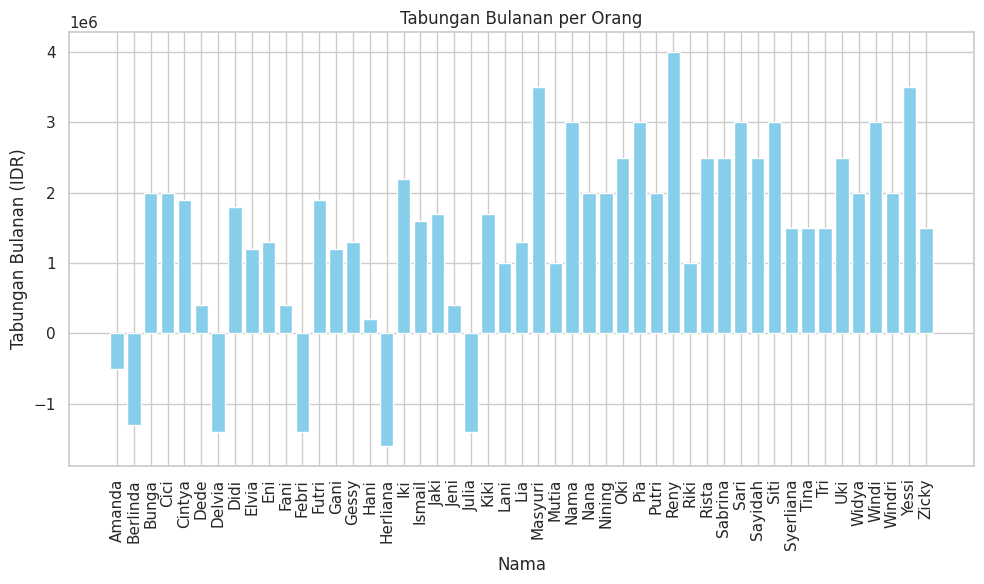

In [30]:
def visualize_financial_analysis(data):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Nama'], data['Tabungan Bulanan'], color='skyblue')
    plt.xlabel('Nama')
    plt.ylabel('Tabungan Bulanan (IDR)')
    plt.title('Tabungan Bulanan per Orang')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Visualisasi data keuangan per orang
visualize_financial_analysis(df)

##Menyediakan Ringkasan Keuangan

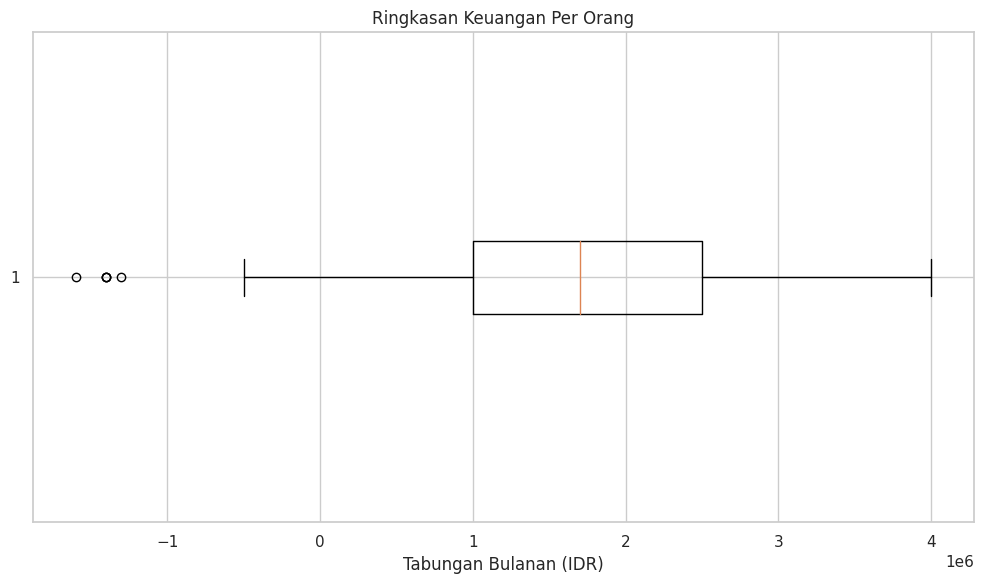

In [31]:
def summarize_financial_data(data):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data['Tabungan Bulanan'], vert=False)
    plt.xlabel('Tabungan Bulanan (IDR)')
    plt.title('Ringkasan Keuangan Per Orang')
    plt.tight_layout()
    plt.show()

# Visualisasi ringkasan keuangan per orang
summarize_financial_data(df)